### Load data

#### Membuat direktori dan file untuk Kaggle API Key

In [0]:
%sh mkdir kaggle_store

In [0]:
import json
dictionary = {"username":"username","key":"key"}
json_object = json.dumps(dictionary, indent=4)

In [0]:
json_object

Out[5]: '{\n    "username": "your username",\n    "key": "your key"\n}'

In [0]:
%sh cat /dev/null > kaggle_store/kaggle.json

In [0]:
with open("kaggle_store/kaggle.json", "w") as outfile:
    outfile.write(json_object)

In [0]:
%sh cat kaggle_store/kaggle.json

{
    "username": "arisbudisantoso",
    "key": "3b985075f76200776947b36d3637faac"
}

In [0]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "kaggle_store"

#### Install Library Kaggle

In [0]:
%sh pip install kaggle

  Created wheel for kaggle: filename=kaggle-1.6.12-py3-none-any.whl size=102990 sha256=72de65be3ce1312c0e646876b13baaf8e0eb9f828e6eac953451bc6efd98ab98
  Stored in directory: /root/.cache/pip/wheels/00/74/7d/52c235c074504ceced3dee430f10873c95d8a9e81263ece28e
Successfully built kaggle
  Attempting uninstall: certifi
    Found existing installation: certifi 2021.10.8
    Not uninstalling certifi at /databricks/python3/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-a76a4a61-7a79-4377-a89b-774bf8368d89
    Can't uninstall 'certifi'. No files were found to uninstall.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-a76a4a61-7a79-4377-a89b-774bf8368d89/bin/python -m pip install --upgrade pip' command.


#### Download data berupa file dari Kaggle

In [0]:
%sh kaggle datasets list -s "Synthetic Financial Datasets For Fraud Detection"

ref                                                         title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ealaxi/paysim1                                              Synthetic Financial Datasets For Fraud Detection   178MB  2017-04-03 08:40:34          88426       1348  0.88235295       
ealtman2019/ibm-transactions-for-anti-money-laundering-aml  IBM Transactions for Anti Money Laundering (AML)     7GB  2023-02-28 11:18:12           6171        114  0.9411765        
sriharshaeedala/financial-fraud-detection-dataset           Financial Fraud Detection Dataset                  178MB  2024-03-07 18:02:06           1061         26  1.0              
bannourchaker/frauddetection                                FraudDetection           

In [0]:
%sh kaggle datasets download -d "ealaxi/paysim1"

Dataset URL: https://www.kaggle.com/datasets/ealaxi/paysim1
License(s): CC-BY-SA-4.0

  0%|          | 0.00/178M [00:00<?, ?B/s]
  3%|▎         | 6.00M/178M [00:00<00:02, 61.2MB/s]
 14%|█▎        | 24.0M/178M [00:00<00:01, 134MB/s] 
 23%|██▎       | 40.0M/178M [00:00<00:00, 149MB/s]
 31%|███       | 55.0M/178M [00:00<00:00, 133MB/s]
 38%|███▊      | 68.0M/178M [00:00<00:00, 117MB/s]
 45%|████▌     | 80.0M/178M [00:00<00:00, 109MB/s]
 52%|█████▏    | 92.0M/178M [00:00<00:00, 113MB/s]
 59%|█████▉    | 105M/178M [00:00<00:00, 99.0MB/s]
 68%|██████▊   | 121M/178M [00:01<00:00, 115MB/s] 
 77%|███████▋  | 136M/178M [00:01<00:00, 125MB/s]
 84%|████████▍ | 149M/178M [00:01<00:00, 123MB/s]
 94%|█████████▍| 167M/178M [00:01<00:00, 137MB/s]
100%|██████████| 178M/178M [00:01<00:00, 125MB/s]



Check Files on Driver Node

In [0]:
dbutils.fs.ls('file:/databricks/driver')

Out[11]: [FileInfo(path='file:/databricks/driver/azure/', name='azure/', size=4096, modificationTime=1713008577603),
 FileInfo(path='file:/databricks/driver/conf/', name='conf/', size=4096, modificationTime=1713008576399),
 FileInfo(path='file:/databricks/driver/hadoop_accessed_config.lst', name='hadoop_accessed_config.lst', size=2755, modificationTime=1713008577603),
 FileInfo(path='file:/databricks/driver/preload_class.lst', name='preload_class.lst', size=1306936, modificationTime=1713008577623),
 FileInfo(path='file:/databricks/driver/logs/', name='logs/', size=4096, modificationTime=1713048786418),
 FileInfo(path='file:/databricks/driver/eventlogs/', name='eventlogs/', size=4096, modificationTime=1713048769802),
 FileInfo(path='file:/databricks/driver/kaggle_store/', name='kaggle_store/', size=4096, modificationTime=1713048875482),
 FileInfo(path='file:/databricks/driver/paysim1.zip', name='paysim1.zip', size=186385561, modificationTime=1568982448000)]

#### Copy data dari driver ke Dataricks File System 

In [0]:
%sh unzip paysim1.zip

Archive:  paysim1.zip
  inflating: PS_20174392719_1491204439457_log.csv  


In [0]:
# Make a directory in FileStore
dbutils.fs.mkdirs("dbfs:/FileStore/paysiml/")

Out[14]: True

Copy file csv from driver fs to dbfs

In [0]:
dbutils.fs.cp("file:/databricks/driver/PS_20174392719_1491204439457_log.csv","dbfs:/FileStore/paysiml/")

Out[15]: True

### Data preprocessing

#### Membuat dataframe dari file csv

In [0]:
df = spark.read.csv('dbfs:/FileStore/paysiml/PS_20174392719_1491204439457_log.csv', header=True)

In [0]:
df.show(5)

+----+--------+--------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
|step|    type|  amount|   nameOrig|oldbalanceOrg|newbalanceOrig|   nameDest|oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|
+----+--------+--------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
|   1| PAYMENT| 9839.64|C1231006815|     170136.0|     160296.36|M1979787155|           0.0|           0.0|      0|             0|
|   1| PAYMENT| 1864.28|C1666544295|      21249.0|      19384.72|M2044282225|           0.0|           0.0|      0|             0|
|   1|TRANSFER|   181.0|C1305486145|        181.0|           0.0| C553264065|           0.0|           0.0|      1|             0|
|   1|CASH_OUT|   181.0| C840083671|        181.0|           0.0|  C38997010|       21182.0|           0.0|      1|             0|
|   1| PAYMENT|11668.14|C2048537720|      41554.0|      29885.86|M1230701703|      

In [0]:
from pyspark.sql.functions import (col, lit, substring, to_date, when)
from pyspark.sql.types import IntegerType

In [0]:
df = df.withColumn("amount",col("amount").cast("integer"))
df = df.withColumn("oldbalanceOrg",col("oldbalanceOrg").cast("integer"))
df = df.withColumn("newbalanceOrig",col("newbalanceOrig").cast("integer"))
df = df.withColumn("oldbalanceDest",col("oldbalanceDest").cast("integer"))
df = df.withColumn("newbalanceDest",col("newbalanceDest").cast("integer"))
df = df.withColumn("isFraud",col("isFraud").cast("integer"))

In [0]:
df.printSchema()

root
 |-- step: string (nullable = true)
 |-- type: string (nullable = true)
 |-- amount: integer (nullable = true)
 |-- nameOrig: string (nullable = true)
 |-- oldbalanceOrg: integer (nullable = true)
 |-- newbalanceOrig: integer (nullable = true)
 |-- nameDest: string (nullable = true)
 |-- oldbalanceDest: integer (nullable = true)
 |-- newbalanceDest: integer (nullable = true)
 |-- isFraud: integer (nullable = true)
 |-- isFlaggedFraud: string (nullable = true)



#### Membuat view dari dataframe

In [0]:
df.createOrReplaceTempView("paysim")

#### Eksplorasi data

In [0]:
df.show(5)

+----+--------+------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
|step|    type|amount|   nameOrig|oldbalanceOrg|newbalanceOrig|   nameDest|oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|
+----+--------+------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
|   1| PAYMENT|  9839|C1231006815|       170136|        160296|M1979787155|             0|             0|      0|             0|
|   1| PAYMENT|  1864|C1666544295|        21249|         19384|M2044282225|             0|             0|      0|             0|
|   1|TRANSFER|   181|C1305486145|          181|             0| C553264065|             0|             0|      1|             0|
|   1|CASH_OUT|   181| C840083671|          181|             0|  C38997010|         21182|             0|      1|             0|
|   1| PAYMENT| 11668|C2048537720|        41554|         29885|M1230701703|             0|       

In [0]:
display(df.groupBy("isFraud").count())

isFraud,count
1,8213
0,6354407


Databricks visualization. Run in Databricks to view.

In [0]:
display(df.groupBy("type").count())

type,count
TRANSFER,532909
CASH_IN,1399284
CASH_OUT,2237500
PAYMENT,2151495
DEBIT,41432


Databricks visualization. Run in Databricks to view.

In [0]:
display(df.groupBy("type").sum('amount'))

type,sum(amount)
TRANSFER,406504804019
CASH_IN,236366699385
CASH_OUT,392991888150
PAYMENT,28092306288
DEBIT,227178671


Databricks visualization. Run in Databricks to view.

#### Eksplorasi data menggunakan SQL

In [0]:
spark.sql('select isFraud, count(1) from paysim group by isFraud').show()

+-------+--------+
|isFraud|count(1)|
+-------+--------+
|      1|    8213|
|      0| 6354407|
+-------+--------+



In [0]:
display(spark.sql('select type, count(1) from paysim where amount > 10000 group by type'))

type,count(1)
TRANSFER,521316
CASH_IN,1351586
CASH_OUT,2164586
PAYMENT,1029492
DEBIT,3783


In [0]:
display(spark.sql('select type, count(1) from paysim where amount is null group by type'))

type,count(1)
TRANSFER,5508
CASH_OUT,142


In [0]:
display(spark.sql('select sum(CASE WHEN amount is not null THEN 0 ELSE 1 END) as nullAmount, sum(CASE WHEN newbalanceOrig is not null THEN 0 ELSE 1 END) as nullNewBal from paysim'))

nullAmount,nullNewBal
5650,145092


#### Klasifikasi Berdasarkan Rule

In [0]:
# Rules to Identify Known Fraud-based
df = df.withColumn("label", 
                   when(
                     (
                       (df.oldbalanceOrg > 56900) & (df.newbalanceOrig > 56900) & (df.newbalanceOrig > 12) & (df.amount > 1160000)
                           ), 1
                   ).otherwise(0))

In [0]:
display(df.groupBy("label").count())

label,count
1,85
0,6362535


In [0]:
display(df.groupBy("label").sum('amount'))

label,sum(amount)
1,152901107
0,1064029975406


In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier

#### Memeriksa missing value

In [0]:
from pyspark.sql.functions import isnan, count
display(df.select([(100 * count(when(isnan(c) | col(c).isNull(), c))/count(c)).alias(c) for c in df.columns]))

step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,label
0.0,0.0,0.08887882119940789,0.0,2.265797658177493,2.333596245967851,0.0,1.7160716355396046,1.905749730285193,0.0,0.0,0.0


#### Menangani missing value

In [0]:
#Replace 0 for null on only population column 
df = df.na.fill(value=0,subset=["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"])

#### Memecah data training dan testing

In [0]:
(train, test) = df.randomSplit([0.8, 0.2], seed=12345)

### Pemodelan

#### Membuat pipeline machine learning

In [0]:
# Encodes a string column of labels to a column of label indices
indexer = StringIndexer(inputCol = "type", outputCol = "typeIndexed")

# VectorAssembler is a transformer that combines a given list of columns into a single vector column
va = VectorAssembler(inputCols = ["typeIndexed", "amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"], outputCol = "features")

# Using the DecisionTree classifier model
dt = DecisionTreeClassifier(labelCol = "isFraud", featuresCol = "features", seed = 54321, maxDepth = 5)

# Create our pipeline stages
pipeline = Pipeline(stages=[indexer, va, dt])

#### Melatih model machine learning

In [0]:
# View the Decision Tree model (prior to CrossValidator)
dt_model = pipeline.fit(train)

### Kinerja Model

#### Hyper Parameter Tuning

In [0]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [0]:
# Build the grid of different parameters
paramGrid = ParamGridBuilder() \
.addGrid(dt.maxDepth, [5, 10, 15]) \
.addGrid(dt.maxBins, [10, 20, 30]) \
.build()

# Build out the cross validation
crossval = CrossValidator(estimator = dt,
                          estimatorParamMaps = paramGrid,
                          evaluator = BinaryClassificationEvaluator().setLabelCol("isFraud"),
                          numFolds = 3)  
# Build the CV pipeline
pipelineCV = Pipeline(stages=[indexer, va, crossval])

In [0]:
# Train the model using the pipeline, parameter grid, and preceding BinaryClassificationEvaluator
cvModel_u = pipelineCV.fit(train)

In [0]:
evaluator = BinaryClassificationEvaluator().setLabelCol("isFraud")
# Build the best model (training and test datasets)
train_pred = cvModel_u.transform(train)
test_pred = cvModel_u.transform(test)

# Evaluate the model on training datasets
pr_train = evaluator.evaluate(train_pred, {evaluator.metricName: "areaUnderPR"})
auc_train = evaluator.evaluate(train_pred, {evaluator.metricName: "areaUnderROC"})

# Evaluate the model on test datasets
pr_test = evaluator.evaluate(test_pred, {evaluator.metricName: "areaUnderPR"})
auc_test = evaluator.evaluate(test_pred, {evaluator.metricName: "areaUnderROC"})

# Print out the PR and AUC values
print("PR train:", pr_train)
print("AUC train:", auc_train)
print("PR test:", pr_test)
print("AUC test:", auc_test)

PR train: 1.9650442855742563e-05
AUC train: 0.6535553885586235
PR test: 1.8694558948618006e-05
AUC test: 0.664305836528762


#### Penanganan Masalah Class Imbalance


In [0]:
# Reset the DataFrames for no fraud (`dfn`) and fraud (`dfy`)
dfn = train.filter(train.isFraud == 0)
dfy = train.filter(train.isFraud == 1)

# Calculate summary metrics
N = train.count()
y = dfy.count()
p = y/N

# Create a more balanced training dataset
train_b = dfn.sample(False, p, seed = 92285).union(dfy)

# Print out metrics
print("Total count: %s, Fraud cases count: %s, Proportion of fraud cases: %s" % (N, y, p))
print("Balanced training dataset count: %s" % train_b.count())

# Display our more balanced training dataset
display(train_b.groupBy("isFraud").count())

Total count: 5090735, Fraud cases count: 6659, Proportion of fraud cases: 0.001308062588211722
Balanced training dataset count: 13250


isFraud,count
0,6591
1,6659


#### Evaluasi kinerja model

In [0]:
# Re-run the same ML pipeline (including parameters grid)
crossval_b = CrossValidator(estimator = dt,
estimatorParamMaps = paramGrid,
evaluator = evaluator,
numFolds = 3)
pipelineCV_b = Pipeline(stages=[indexer, va, crossval_b])

# Train the model using the pipeline, parameter grid, and BinaryClassificationEvaluator using the `train_b` dataset
cvModel_b = pipelineCV_b.fit(train_b)

# Build the best model (balanced training and full test datasets)
train_pred_b = cvModel_b.transform(train_b)
test_pred_b = cvModel_b.transform(test)

# Evaluate the model on training datasets
pr_train_b = evaluator.evaluate(train_pred_b, {evaluator.metricName: "areaUnderPR"})
auc_train_b = evaluator.evaluate(train_pred_b, {evaluator.metricName: "areaUnderROC"})

# Evaluate the model on test datasets
pr_test_b = evaluator.evaluate(test_pred_b, {evaluator.metricName: "areaUnderPR"})
auc_test_b = evaluator.evaluate(test_pred_b, {evaluator.metricName: "areaUnderROC"})

# Print out the PR and AUC values
print("PR train:", pr_train_b)
print("AUC train:", auc_train_b)
print("PR test:", pr_test_b)
print("AUC test:", auc_test_b)

PR train: 0.00045454545454545455
AUC train: 0.5023784355179703
PR test: 0.0006026365348399247
AUC test: 0.9896227520287073


In [0]:
from sklearn.metrics import confusion_matrix,f1_score,log_loss,roc_curve,recall_score,precision_recall_curve,precision_score,fbeta_score,auc, roc_auc_score, accuracy_score, classification_report, ConfusionMatrixDisplay, RocCurveDisplay

In [0]:
import numpy as np

In [0]:
nptest = np.array(test_pred_b.select('isFraud').collect())

In [0]:
nppred = np.array(test_pred_b.select('prediction').collect())

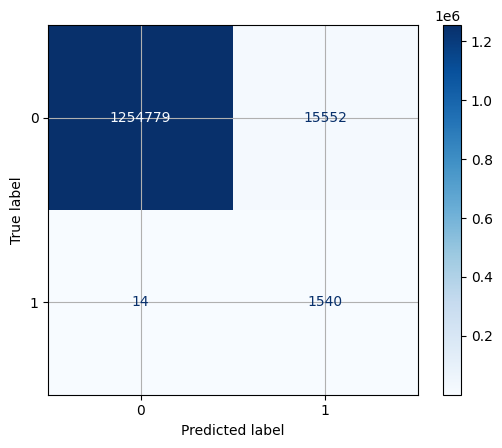

In [0]:
cm_test = confusion_matrix(nptest, nppred, labels=[0,1])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0,1])
disp_test.plot(cmap='Blues', values_format='').ax_.grid()

#### Contoh

### Referensi
https://www.databricks.com/blog/2019/05/02/detecting-financial-fraud-at-scale-with-decision-trees-and-mlflow-on-databricks.html
https://sparkbyexamples.com/pyspark/pyspark-fillna-fill-replace-null-values/
https://medium.com/@srinivasugaddam/machine-learning-model-selection-and-hyperparameter-tuning-using-pyspark-80dd8c1bfc56
https://api-docs.databricks.com/python/pyspark/latest/api/pyspark.ml.evaluation.BinaryClassificationEvaluator.html